<a href="https://colab.research.google.com/github/LEESUAJE1978/deeplearning_sejong/blob/master/ex03_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#0. 텐서플로우 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 1.x
except Exception:
    pass
import tensorflow as tf
import numpy as np

print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


1. 텐서플로우 회귀분석

1.1. 데이터 셋 생성

In [2]:
x_train=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y_train=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

1.2. 모델에 학습 데이터를 놓어 주기 위한 플레이스 홀더(Place holder 생성)

In [3]:
X = tf.placeholder(tf.float32, shape = None)
Y = tf.placeholder(tf.float32, shape=None)

1.3. 학습을 통해 구할 변수(W,b) 지정


In [4]:
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

1.4. 가설 생성

In [5]:
# Our hypothesis XW+b
hypothesis = X * W + b

1.5. 비용함수(Cost Function) MSE

In [6]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))  #reduce_mean:모수로 나눠주는 작업, square : 제곱을 해주는 작업

1.6. 경사하강법(Gradient Decent) 비용함수 최적화(Cost Function Optimizer)

In [7]:
# optimizer
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

1.7. 세션 실행(Session)

1.7.1 컨텍스트 매니저(Context Manager)

In [ ]:
# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())

    # Fit the line
    for step in range(2001):
      cost_val, W_val, b_val,train_val = sess.run([cost, W, b, train],
                                                  feed_dict = {
                                                      X: x_train,
                                                      Y: y_train
                                                  })
      if step % 20 == 0:
        print(step, "Cost:", cost_val, "\tW : ", W_val, "\tb:", b_val)
   
    print("H(10) 시험성적:", sess.run(hypothesis, feed_dict= {X:[12]}))

1.7.2. close() 매서드

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
  cost_val, W_val, b_val,train_val = sess.run([cost, W, b, train],
                                              feed_dict = {
                                                      X: x_train,
                                                      Y: y_train
                                                  })
  if step % 20 == 0:
    print(step, "Cost:", cost_val, "\tW : ", W_val, "\tb:", b_val)


1.8. 예측(Prediction)

In [10]:
print("H(10) 시험성적:", sess.run(hypothesis, feed_dict= {X:[20]}))

H(10) 시험성적: [214.4724]


1.9.전체 코드

In [ ]:
x_train=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y_train=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

X = tf.placeholder(tf.float32, shape = None)
Y = tf.placeholder(tf.float32, shape=None)

W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Our hypothesis XW+b
hypothesis = X * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))  #reduce_mean:모수로 나눠주는 작업, square : 제곱을 해주는 작업

# optimizer
train = tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(cost)

with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())

    # Fit the line
    for step in range(2001):
      cost_val, W_val, b_val,train_val = sess.run([cost, W, b, train],
                                                  feed_dict = {
                                                      X: x_train,
                                                      Y: y_train
                                                  })
      if step % 20 == 0:
        print(step, "Cost:", cost_val, "\tW : ", W_val, "\tb:", b_val)
   
    print("시험성적:", sess.run(hypothesis, feed_dict= {X:[3]}))

2. Keras 회귀분석

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1,input_dim=1))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트
import numpy as np # Numpy를 임포트

In [ ]:
#X=np.array([1,2,3,4,5,6,7,8,9]) # 공부하는 시간
#y=np.array([11,22,33,44,53,66,77,87,95]) # 각 공부하는 시간에 맵핑되는 성적

X = [1, 2, 3]
y = [1, 2, 3]
model=Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
sgd=optimizers.SGD(lr=0.01)
# 학습률(learning rate, lr)은 0.01로 합니다.
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
# sgd는 경사 하강법을 의미.
# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.fit(X,y, batch_size=1, epochs=300, shuffle=False)
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.

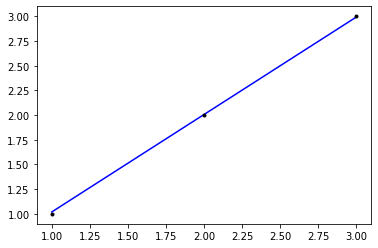

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

In [ ]:
print(model.predict([9.5]))

[[9.396553]]


3.파이썬 회귀분석

In [12]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
x_train=np.array([1,2,3,4,5,6,7,8,9]) # 공부하는 시간
y_train=np.array([11,22,33,44,53,66,77,87,95]) # 각 공부하는 시간에 맵핑되는 성적

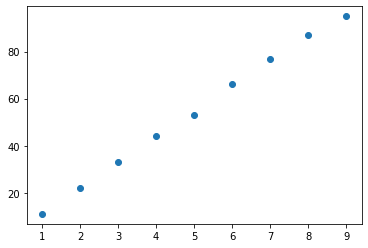

In [14]:
plt.plot(x_train, y_train,'o')
plt.show()

In [21]:
line_fitter = LinearRegression()
line_fitter.fit(x_train.reshape(-1,1), y_train) #X는 2차원 array 형태([[x1], [x2], ...[xn]]로 입력되어야 하기 때문에 형변환 필요 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
line_fitter.predict([[8]])

array([86.27222222])

4. 다변량 회귀분석(Multivariable Regression)


4.1 데이터 셋 생성

In [23]:
x1_data = [75, 91, 87, 93, 74]
x2_data = [83, 89, 93, 97, 66]
x3_data = [74, 97,92, 100, 86]
y_data = [87, 95, 96, 92, 87]

4.2. 플레이스 홀더 생성

In [24]:
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

4.3. 변수 생성

In [25]:
w1 = tf.Variable(tf.random_normal([1]), name = 'weight1')
w2 = tf.Variable(tf.random_normal([1]), name = 'weight2')
w3 = tf.Variable(tf.random_normal([1]), name = 'weight3')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

4.4. 가설 수립


In [26]:
hypothesis = x1 * w1 + x2 * w2 + x3 * w3 +b

4.5 비용함수 

In [27]:
cost = tf.reduce_mean(tf.square(hypothesis -Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

4.6 세션 실행

In [31]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())


In [ ]:
for step in range(2001):
  cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                 feed_dict = {x1: x1_data, x2 : x2_data, x3:x3_data, Y: y_data})
  if step % 10 == 0:
    print(step, 'Cost: ', cost_val, "\nPrediction: \n", hy_val)

In [39]:
  print("시험성적:", sess.run(hypothesis, feed_dict= {x1: [88], x2: [60], x3: [94]}))

시험성적: [72.75515]
